* 데이터 수집      
https://data.seoul.go.kr/dataList/5/literacyView.do

In [4]:
import pandas as pd

In [5]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 확인 및 전처리

## 2021년 공공자전거 대여이력 정보

### 데이터프레임 생성/확인

In [8]:
df1 = pd.read_csv('../data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('../data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('../data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('../data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('../data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('../data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

In [ ]:
df1.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.0


### 데이터 연결/확인
* concat

In [10]:
# concat
df = pd.concat([df1,df2,df3,df4,df5,df6])
len(df)

13613873

In [11]:
# head
df.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0


In [12]:
#tail
df.tail(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


In [13]:
# 데이터 크기
# 데이터 정보(사용메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


In [14]:
# 데이터 크기
df.shape

(13613873, 11)

## 데이터 전처리

### 불필요한 컬럼 제거

In [15]:
df.head(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11.0,1853.99


In [16]:
df.isnull().sum()
print(df["대여거치대"].unique())
print(df["반납거치대"].unique())

[0 7 99 1 4 3 19 2 20 16 11 12 10 9 5 8 6 15 23 17 13 14 18 40 38 33 22 24
 39 26 21 27 25 32 29 30 34 31 28 36 37 35 '0' '8' '99' '1' '7' '11' '6'
 '2' '10' '5' '17' '3' '4' '15' '16' '12' '9' '18' '19' '14' '13' '21'
 '28' '20' '26' '30' '25' '22' '23' '24' '39' '36' '37' '34' '32' '29'
 '27' '2021-02-06 09:29:07' '31' '33' '2021-02-08 08:57:41'
 '2021-02-09 22:11:59' '35' '2021-02-18 13:04:47' '40'
 '2021-02-22 15:03:56' '38' '2021-02-24 08:11:15' '2021-02-26 12:32:20'
 '2021-02-26 13:47:05' '2021-02-27 21:07:10' '2021-03-02 14:20:36'
 '2021-03-02 20:39:35' '2021-03-02 22:30:53' '2021-03-03 18:08:05'
 '2021-03-03 19:10:48' '2021-03-04 06:37:43' '2021-03-04 12:53:15'
 '2021-03-05 15:47:47' '2021-03-06 00:22:21' '2021-03-06 14:09:35'
 '2021-03-08 14:32:51' '2021-03-08 18:17:54' '2021-03-09 07:23:12'
 '2021-03-09 07:44:56' '2021-03-12 13:39:05' '2021-03-12 18:11:17'
 '2021-03-12 18:53:10' '2021-03-13 10:03:30' '2021-03-14 21:42:44'
 '2021-03-16 20:08:51' '2021-03-17 20:09:40' '2021-03-

In [17]:
# 자전거번호, 대여거치대, 반납거치대 
df.drop(columns=["자전거번호", "대여거치대", "반납거치대"],inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 934.8+ MB


In [19]:
df.head(1)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.0


### 자료형 확인/변경

In [20]:
# 자료형 확인
df.dtypes

대여일시         object
대여 대여소번호      int64
대여 대여소명      object
반납일시         object
반납대여소번호      object
반납대여소명       object
이용시간        float64
이용거리        float64
dtype: object

In [21]:
print(df["대여 대여소번호"].nunique())
print(df["대여 대여소번호"].unique())
print(df["반납대여소번호"].nunique())
print(df["반납대여소번호"].unique())
#대여와 반납 대여소는 같은 대여소. 
#  데이터 대비 카테고리 형으로 줄이는게 데이터 크기를 줄이는데 이로움

2493
[   3    5   10 ... 3640 3811 4322]
4811
[668 540 594 ... '연신내역 1번 출구' '스페이스 살림 앞' '03811']


In [22]:
# 카테고리형으로 변경  :    대여 대여소번호, 반납대여소번호
df["대여 대여소번호"]=df["대여 대여소번호"].astype("category")
df["반납대여소번호"]=df["반납대여소번호"].astype("category")

In [23]:
df.dtypes

대여일시          object
대여 대여소번호    category
대여 대여소명       object
반납일시          object
반납대여소번호     category
반납대여소명        object
이용시간         float64
이용거리         float64
dtype: object

In [24]:
# 메모리 용량 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [25]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05


In [26]:
# datetime형으로 변경 : 대여일시,반납일시
df["대여일시"] = pd.to_datetime(df["대여일시"])

In [27]:
df["반납일시"] = pd.to_datetime(df["반납일시"] ,errors = "coerce")


In [28]:
# 자료형 변경 확인
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

## 결측치 확인/처리

In [29]:
# 결측치 확인
df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        146
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [30]:
# 결측치 제거
df.dropna(inplace=True)

In [31]:
# 결측치 확인
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 일별 이용 현황

## 대여날짜 컬럼 추가
* date

In [57]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05
...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00


In [58]:
df["대여날짜"] = df["대여일시"].dt.date
# 연월일을 가져오려면 date

In [59]:
df.head(3)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13


## 대여날짜 별 대여 건수
* groupby
* to_frame

In [63]:
# 대여날짜 별 대여건수 추출
df_count = df.groupby("대여날짜")["대여일시"].count().to_frame()

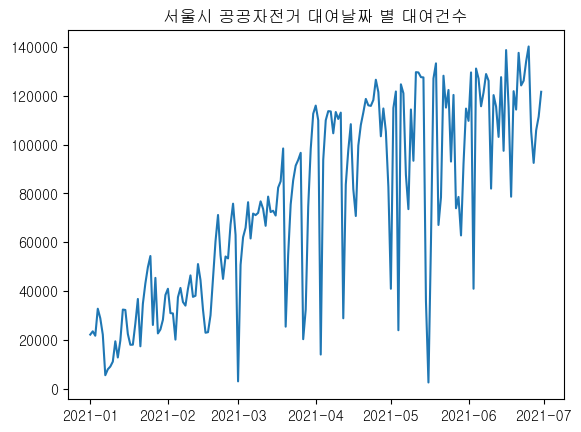

In [67]:
# 대여날짜 별 대여건수 시각화
df_count.columns = ["대여건수"]
y = df_count.values
x = df_count.index

plt.plot(x,y)
plt.title("서울시 공공자전거 대여날짜 별 대여건수")
plt.show()

## 대여날짜 별 이용시간
* groupby
* to_frame

In [70]:
# 대여날짜 별 이용시간 
df_time = df.groupby("대여날짜").이용시간.sum().to_frame()
df_time

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


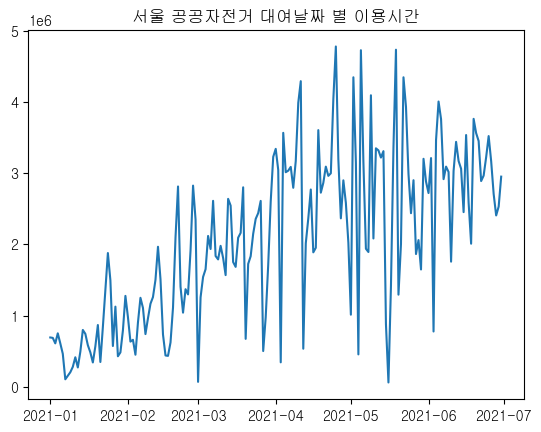

In [72]:
# 대여날짜 별 이용시간 시각화
y = df_time.values
x = df_time.index

plt.plot(x,y)
plt.title("서울 공공자전거 대여날짜 별 이용시간")
plt.show()

## 대여날짜 별 이용 거리

In [75]:
# 대여날짜 별 이용거리 추출
df_distance = df.groupby("대여날짜").이용거리.sum().to_frame()
df_distance

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


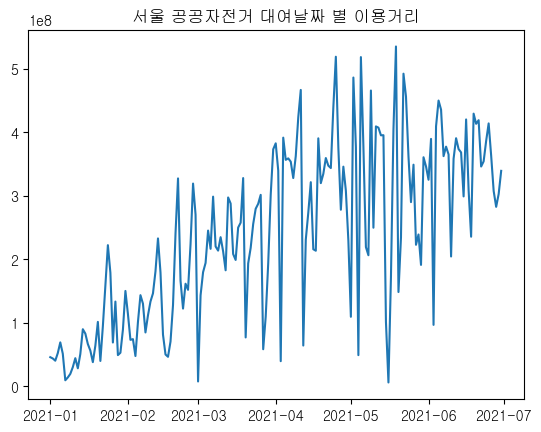

In [76]:
# 대여날짜 별 이용거리 시각화
y = df_distance.values
x = df_distance.index

plt.plot(x,y)
plt.title("서울 공공자전거 대여날짜 별 이용거리")
plt.show()

## 데이터프레임 합치기

In [79]:
df_total = pd.concat([df_count,df_time,df_distance],axis=1)
df_total

,대여건수,이용시간,이용거리
대여날짜,,,
2021-01-01,22119,692309.0,4.613529e+07
2021-01-02,23463,686580.0,4.409618e+07
2021-01-03,21656,609571.0,4.059830e+07
2021-01-04,32732,750721.0,5.249645e+07
2021-01-05,28819,610227.0,6.944856e+07
...,...,...,...
2021-06-26,105414,3168288.0,3.635015e+08
2021-06-27,92486,2706168.0,3.078146e+08
2021-06-28,105882,2405249.0,2.828124e+08


# 시간대별 대여/반납 현황

## 대여시간, 반납시간 컬럼 추가

In [80]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18


In [81]:
df["대여시간"] = df["대여일시"].dt.hour
df["반납시간"] = df["반납일시"].dt.hour

In [83]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
대여시간                 int32
반납시간                 int32
dtype: object

## 시간대별 대여/반납 현황

In [84]:
df.head(3)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21


In [88]:
# 시간대별 대여현황
s_rental=df["대여시간"].value_counts()

In [87]:
# 시간대별 반납현황
s_return=df["반납시간"].value_counts()

## 시각화

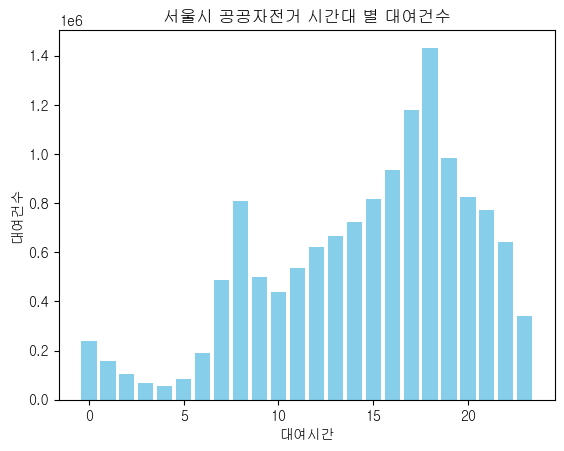

In [99]:
# 시간대별 공공자전거 대여건수 시각화
s_rental = s_rental.sort_index()

y = s_rental.values
x = s_rental.index

plt.bar(x,y,color="skyblue")
plt.title("서울시 공공자전거 시간대 별 대여건수")
plt.xlabel("대여시간")
plt.ylabel("대여건수")
plt.show()

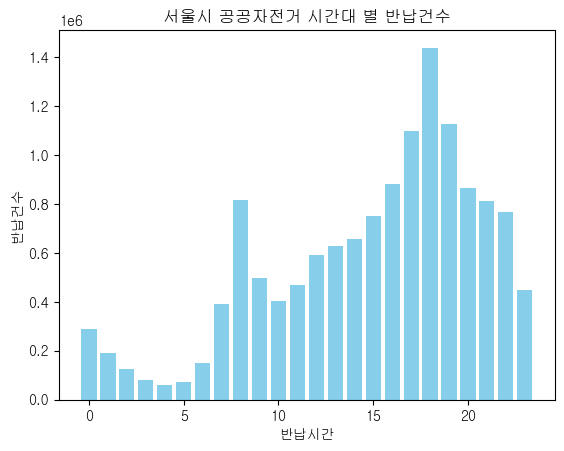

In [100]:
# 시간대별 공공자전거 반납건수 시각화
s_return = s_return.sort_index()

y = s_return.values
x = s_return.index

plt.bar(x,y,color="skyblue")
plt.title("서울시 공공자전거 시간대 별 반납건수")
plt.xlabel("반납시간")
plt.ylabel("반납건수")
plt.show()

# 대여소별 대여/반납 현황

## 대여소 현황

In [103]:
# 대여 대여소번호 갯수
df["대여 대여소번호"].nunique()
#몇 개의 대여소가 있는지 파악

2493

In [104]:
# 반납대여소번호 갯수
df["반납대여소번호"].nunique()

4674

In [110]:
df["반납대여소번호"]

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: object

In [111]:
# 반납대여소 번호 처리 (str형으로 변환)
df["반납대여소번호"]=df["반납대여소번호"].astype("str")

In [112]:
# 반납대여소 번호 처리 (왼쪽의 '0' 제거)
df["반납대여소번호"]=df["반납대여소번호"].str.lstrip("0")

In [115]:
# 반납대여소 번호 처리 (int형으로 변환)
df["반납대여소번호"]=df["반납대여소번호"].astype("int")

In [116]:
# 반납대여소 번호 처리 (category형으로 변환)
df["반납대여소번호"]=df["반납대여소번호"].astype("category")

In [117]:
df["반납대여소번호"]

0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (2493, int32): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

## 대여건수가 가장 많은 대여소 best10

In [122]:
# value_counts
df[["대여 대여소번호","대여 대여소명"]].value_counts().to_frame()[:10]

,,count
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


## 반납건수가 가장 많은 대여소 best10

In [124]:
# value_counts
df[["반납대여소번호","반납대여소명"]].value_counts().to_frame()[:10]

,,count
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


## 여의나루역 1번출구 앞 대여소 이용현황

### 서브셋 만들기

In [126]:
df_207 = df[df["대여 대여소번호"]==207]
df_207

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11
...,...,...,...,...,...,...,...,...,...,...,...
3445365,2021-06-30 22:34:23,207,여의나루역 1번출구 앞,2021-07-01 00:12:03,4526,목동아파트2단지 222동 앞,97.0,9268.32,2021-06-30,22,0
3445420,2021-06-30 22:36:03,207,여의나루역 1번출구 앞,2021-07-01 00:12:31,1148,볏골공원,96.0,10957.26,2021-06-30,22,0
3445452,2021-06-30 22:36:11,207,여의나루역 1번출구 앞,2021-07-01 00:12:44,704,남부법원검찰청 교차로,96.0,11358.59,2021-06-30,22,0
3445463,2021-06-30 22:53:04,207,여의나루역 1번출구 앞,2021-07-01 00:12:47,207,여의나루역 1번출구 앞,80.0,0.00,2021-06-30,22,0


### 반납 현황

In [127]:
# value_counts
df_207[["반납대여소번호","반납대여소명"]].value_counts().to_frame()[:10]


,,count
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
221,여의도초교 앞,1209
210,IFC몰,1063
215,여의도고교 앞,986
217,NH농협은행 앞,979


### 요일별 대여현황

In [128]:
#요일컬럼 추가 : strftime('%a')
df_207["대여요일"]=df_207["대여일시"].dt.strftime("%a")

C:\Users\khm98\AppData\Local\Temp\ipykernel_14656\2273999959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207["대여요일"]=df_207["대여일시"].dt.strftime("%a")


In [129]:
# value_counts
df_207

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,대여요일
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,Fri
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,Fri
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,Fri
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,Fri
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...
3445365,2021-06-30 22:34:23,207,여의나루역 1번출구 앞,2021-07-01 00:12:03,4526,목동아파트2단지 222동 앞,97.0,9268.32,2021-06-30,22,0,Wed
3445420,2021-06-30 22:36:03,207,여의나루역 1번출구 앞,2021-07-01 00:12:31,1148,볏골공원,96.0,10957.26,2021-06-30,22,0,Wed
3445452,2021-06-30 22:36:11,207,여의나루역 1번출구 앞,2021-07-01 00:12:44,704,남부법원검찰청 교차로,96.0,11358.59,2021-06-30,22,0,Wed
3445463,2021-06-30 22:53:04,207,여의나루역 1번출구 앞,2021-07-01 00:12:47,207,여의나루역 1번출구 앞,80.0,0.00,2021-06-30,22,0,Wed


In [130]:
df_207["대여요일"].value_counts()

대여요일
Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: count, dtype: int64

### 이용시간 통계

In [132]:
# 이용시간 평균
df_207["이용시간"].mean()

50.28551344300312

In [133]:
# 이용시간 최대
df_207["이용시간"].max()

1268.0

In [134]:
# 이용시간 최소
df_207["이용시간"].min()

1.0

In [135]:
# 전체데이터 이용시간 평균
df["이용시간"].mean()

27.27823322905529